In [1]:
%matplotlib inline
if __package__ is None:
    import sys, os
    sys.path.append(os.path.realpath("/data/shared/Software/"))
from CMS_SURF_2016.utils.archiving import *
from CMS_SURF_2016.layers.slice import Slice
from CMS_SURF_2016.layers.lorentz import Lorentz
from keras.utils.visualize_util import plot
from IPython.display import Image, display
from CMS_SURF_2016.utils.colors import colors_contrasting, showColors
from CMS_SURF_2016.utils.analysistools import *
from CMS_SURF_2016.utils.plot import *
import numpy as np
from CMS_SURF_2016.utils.plot import plot_history, print_accuracy_m
archive_dir = "/data/shared/Delphes/non_repo/CSCS_output/keras_archive/"


#def sortTrialsOn(lst):
    

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
trials = get_trials_by_name("(not_lorentz|lorentz)", archive_dir)
for trial in trials:
    trial.summary(showTraining=False,showValidation=False, showFit=False, showCompilation=False)
print("TotalNumber of Trials:", len(trials)) 

--------------------------------------------------
TRIAL SUMMARY (06325aef09e6933addac0beae93915722010a1c1)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 1:50:49, fit_cycles = 1
        val_acc = 0.5556
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 4, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 100
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (1a42c0f7e32a50f221f01bee213b5889b9b4e42b)
    Record_Info:
        name = [u'trial', u'not_lorentz'], elapse_time = 0:07:20, fit_cycles = 1
        val_acc = 0.7518
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 3, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, sort_on = PT_ET
--------------------------------------------------
-------------------------------------------------

In [3]:
control = get_trials_by_name("not_lorentz", archive_dir)
lorentz = get_trials_by_name("lorentz", archive_dir)
#control = findWithMetrics(trials, {"name" : "not_lorentz"})
#lorentz = findWithMetrics(trials, {"name" : "lorentz"})
sortOnMetric(control, "val_acc")
sortOnMetric(lorentz, "val_acc")
labels = ['ttbar', 'wjet', 'qcd']
#print_by_labels(trials, 4)
best_controls = control[:4]
best_lorentzs = lorentz[:4]

--------------------------------------------------
TRIAL SUMMARY (a1d551f4e6731388d95061934bcf844715d924b7)
    Record_Info:
        name = [u'trial', u'not_lorentz'], elapse_time = 0:10:07, fit_cycles = 1
        val_acc = 0.7685
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 5, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


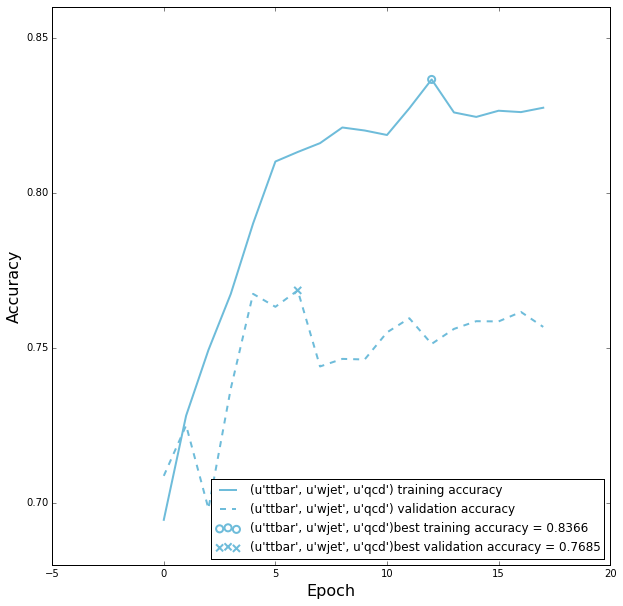

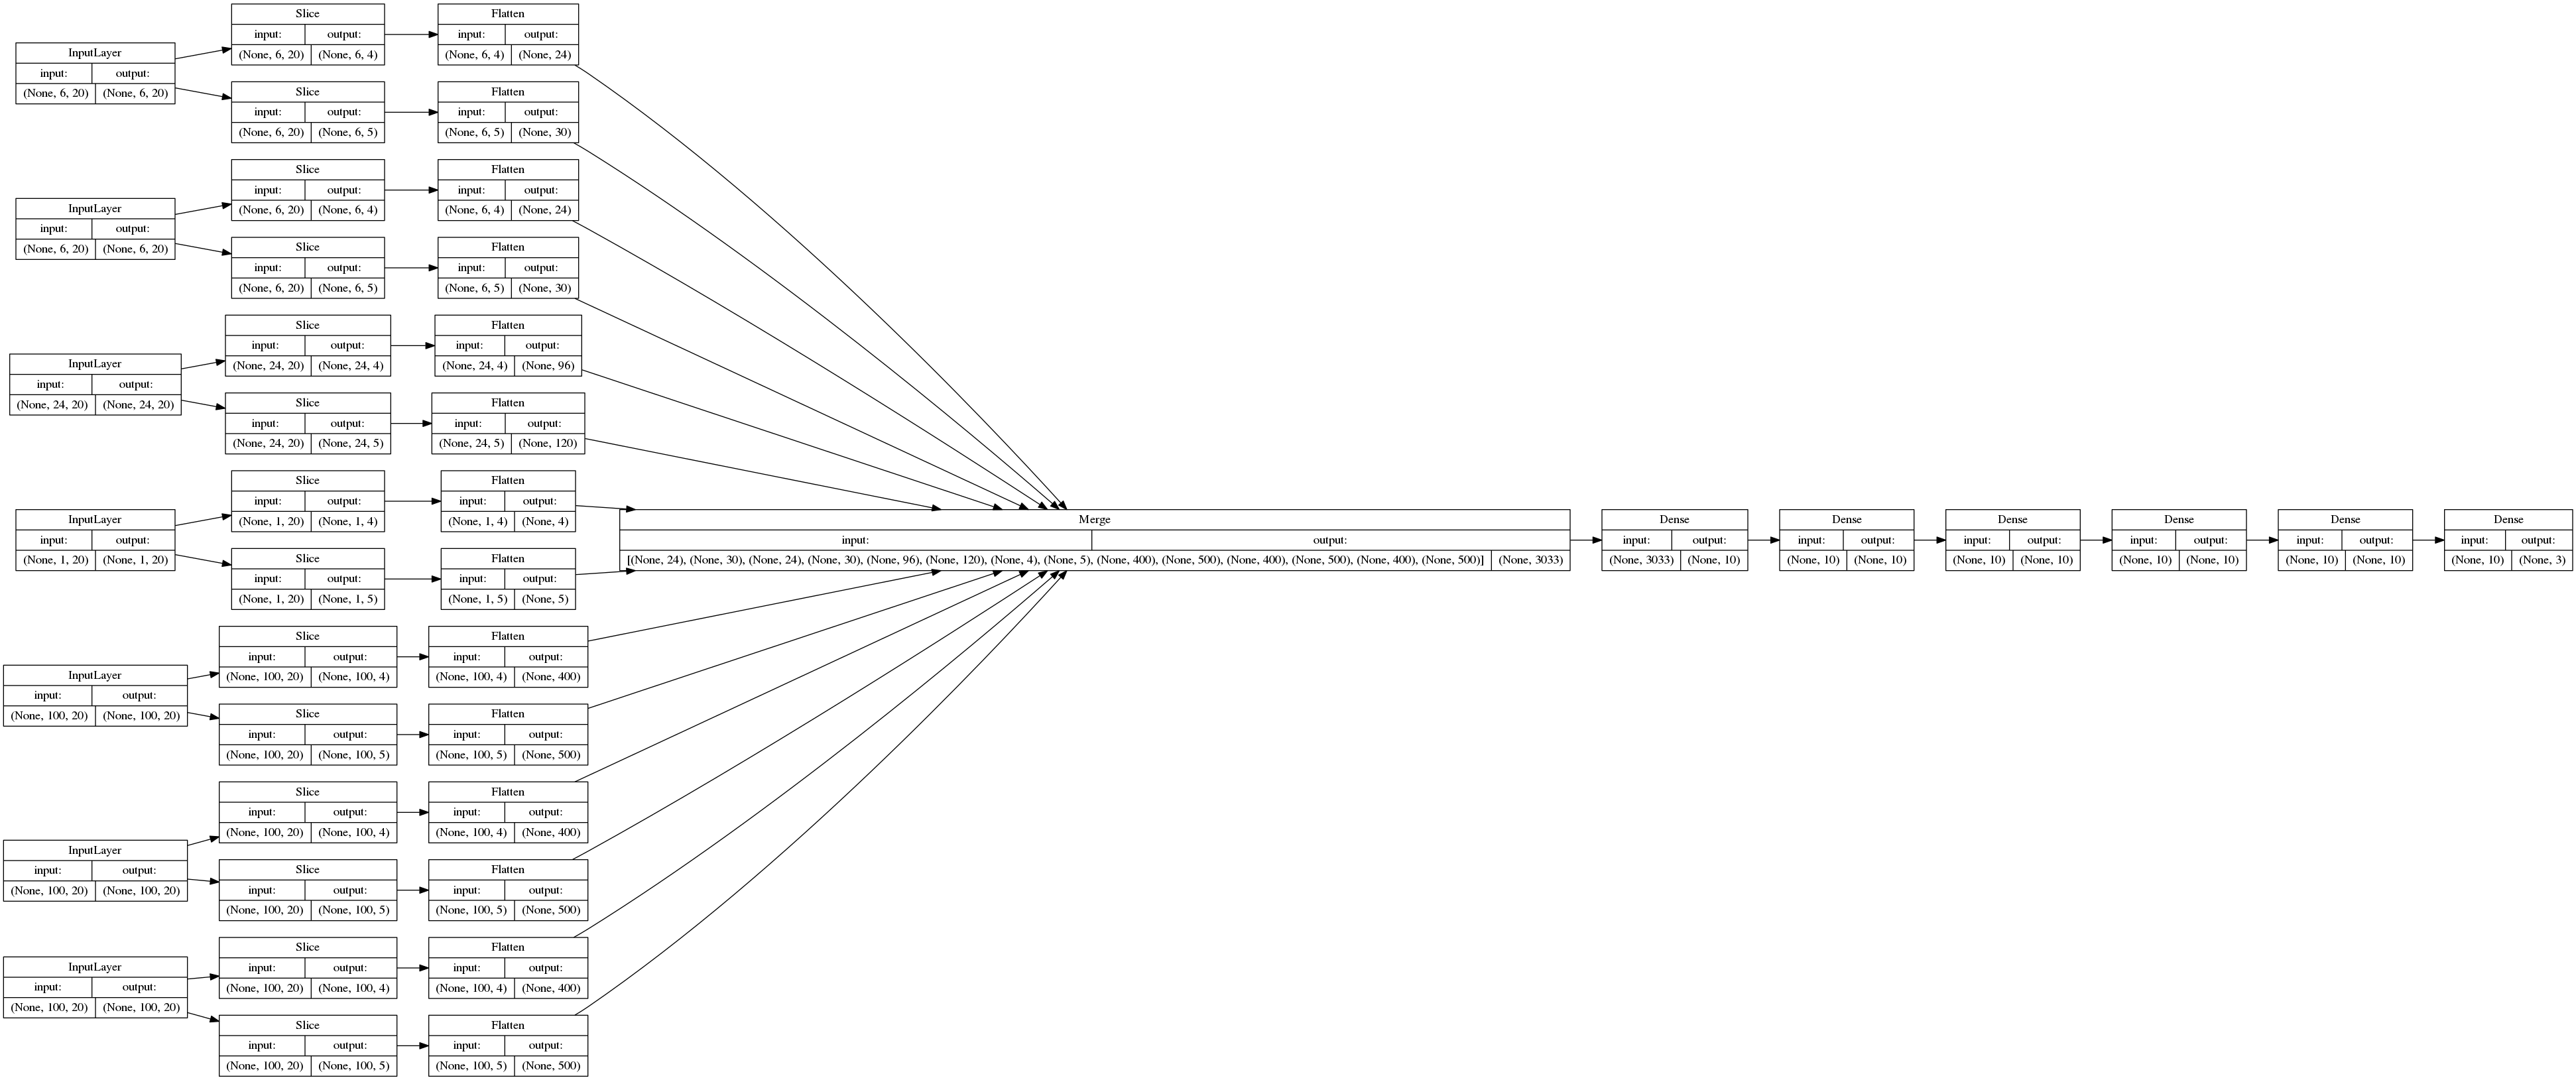

--------------------------------------------------
TRIAL SUMMARY (225869cf047926aac4bbab436837a05835a3c733)
    Record_Info:
        name = [u'trial', u'not_lorentz'], elapse_time = 0:20:58, fit_cycles = 1
        val_acc = 0.7646
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 2, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


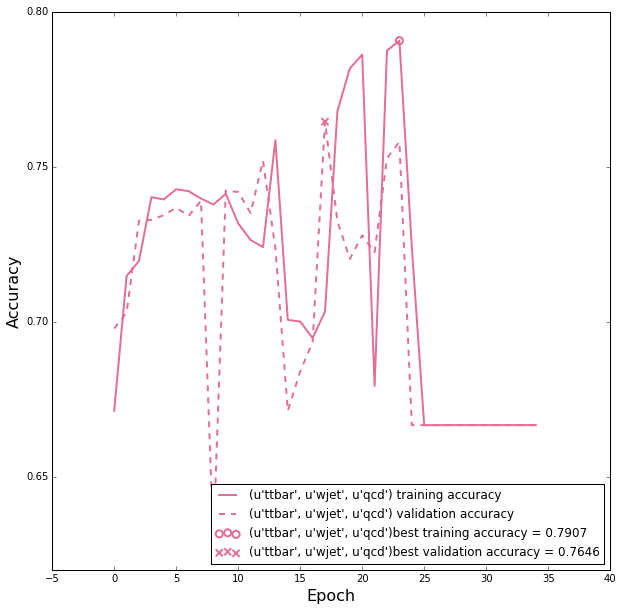

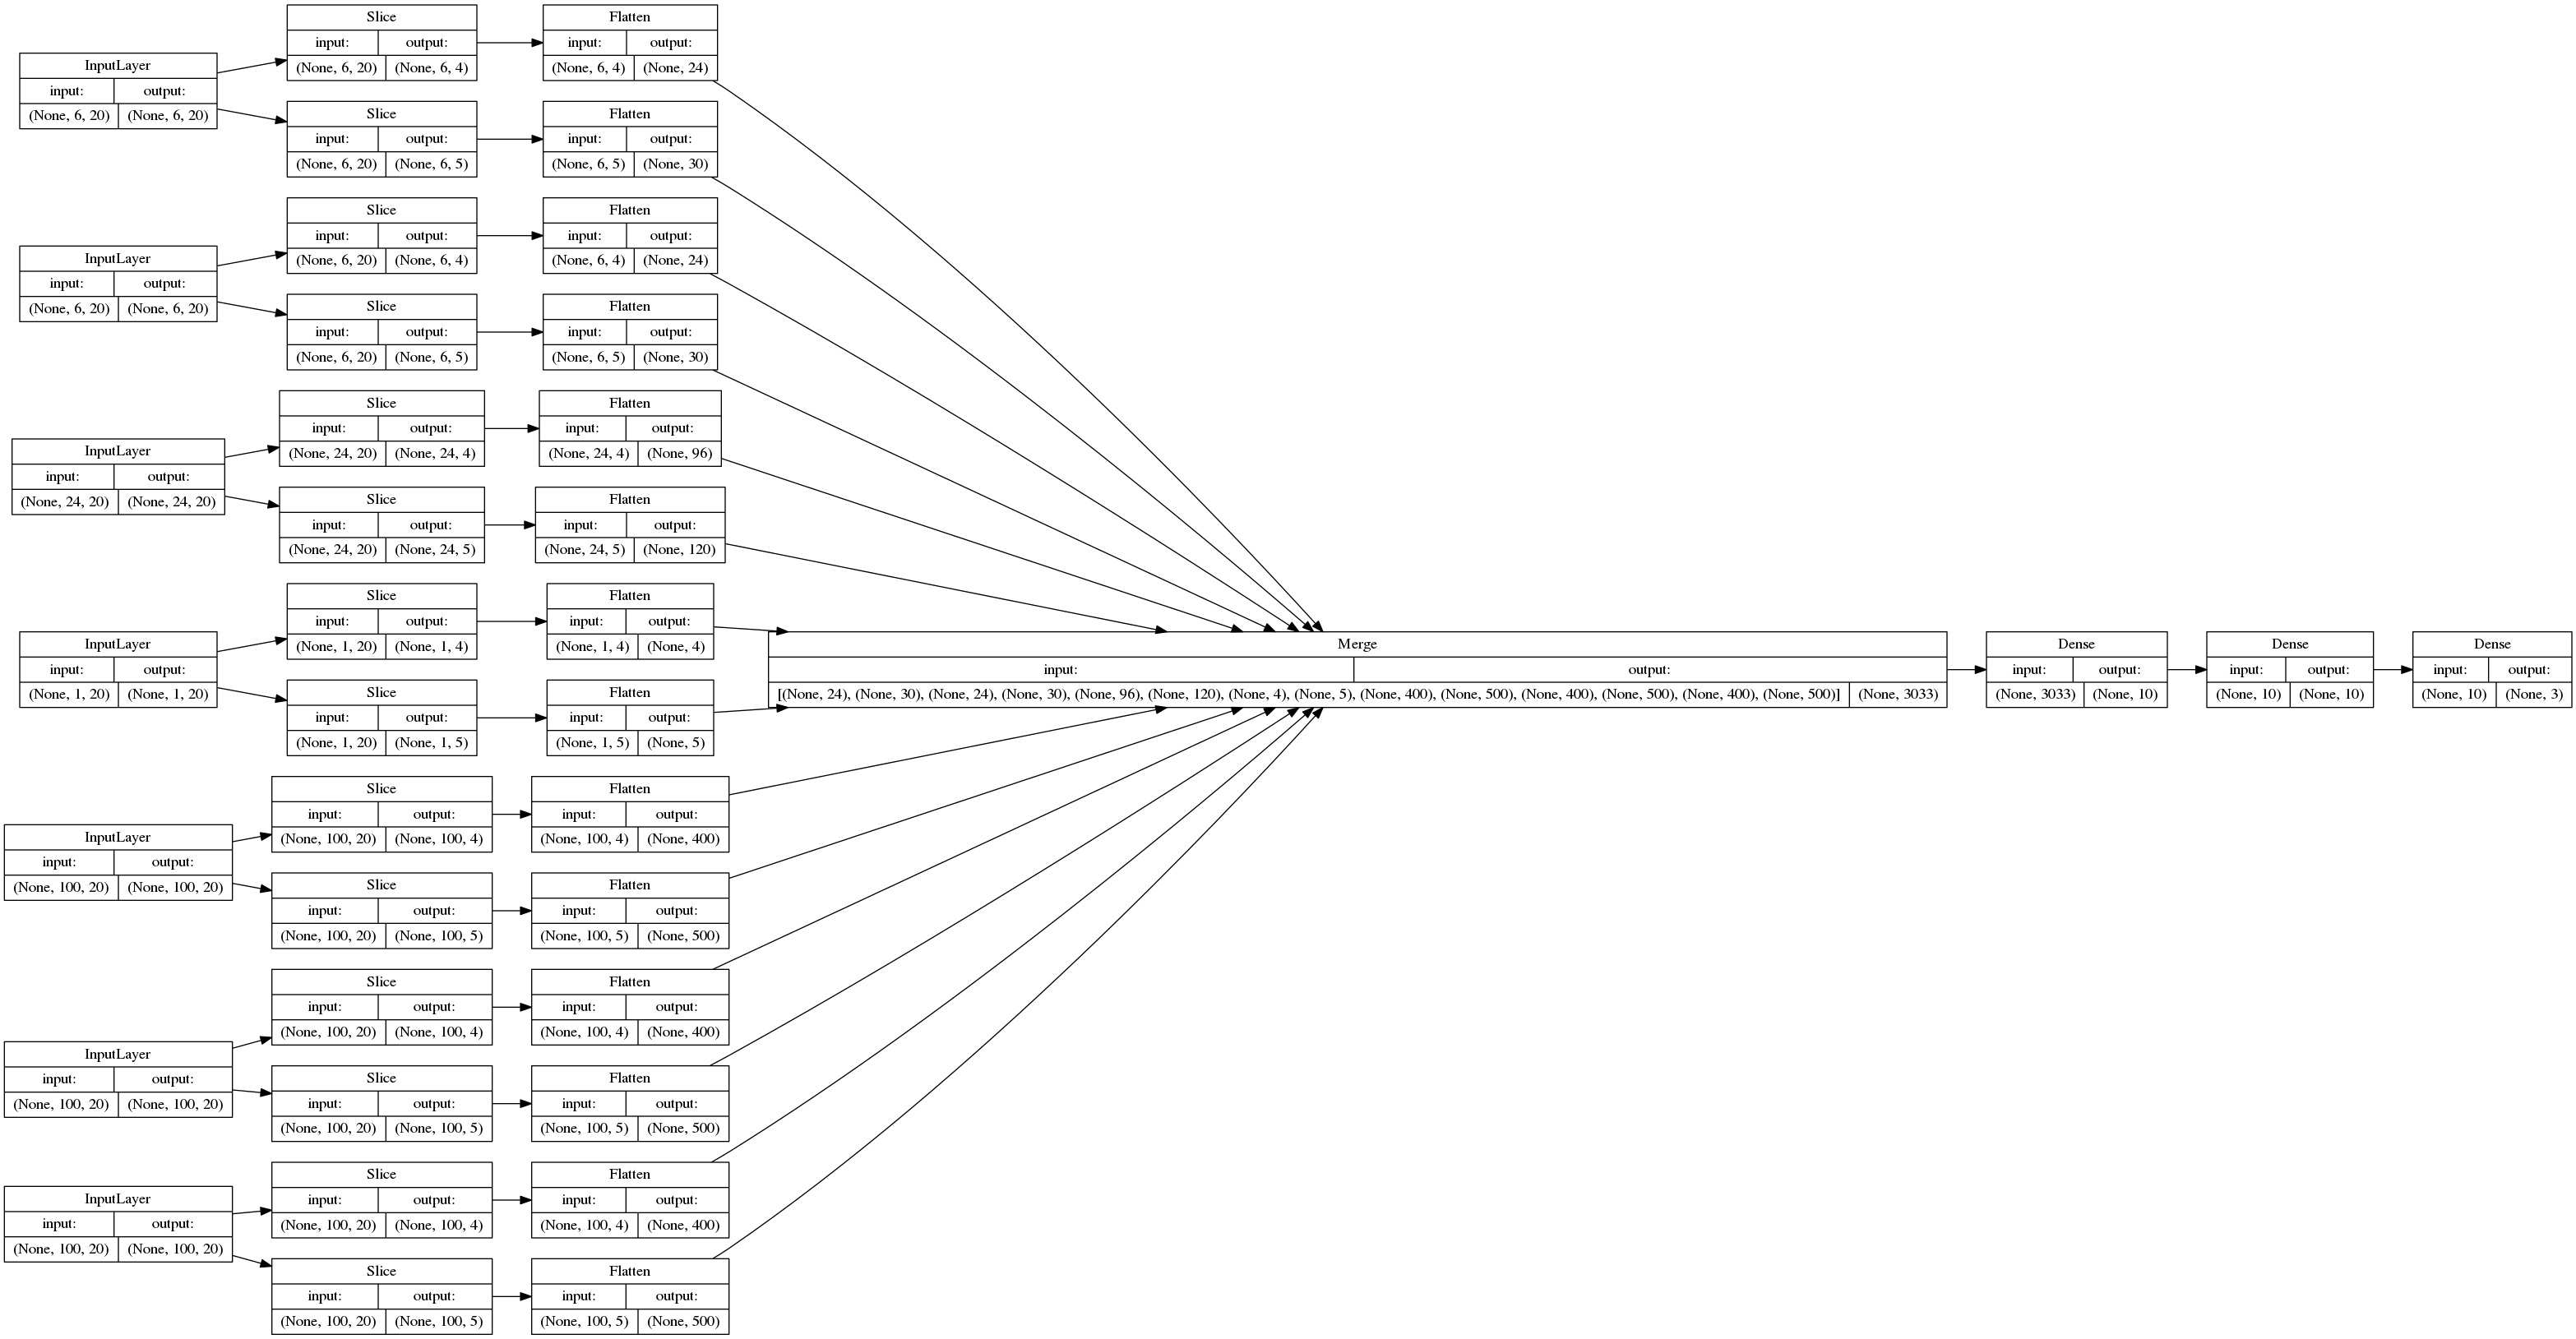

--------------------------------------------------
TRIAL SUMMARY (1a42c0f7e32a50f221f01bee213b5889b9b4e42b)
    Record_Info:
        name = [u'trial', u'not_lorentz'], elapse_time = 0:07:20, fit_cycles = 1
        val_acc = 0.7518
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 3, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, sort_on = PT_ET
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


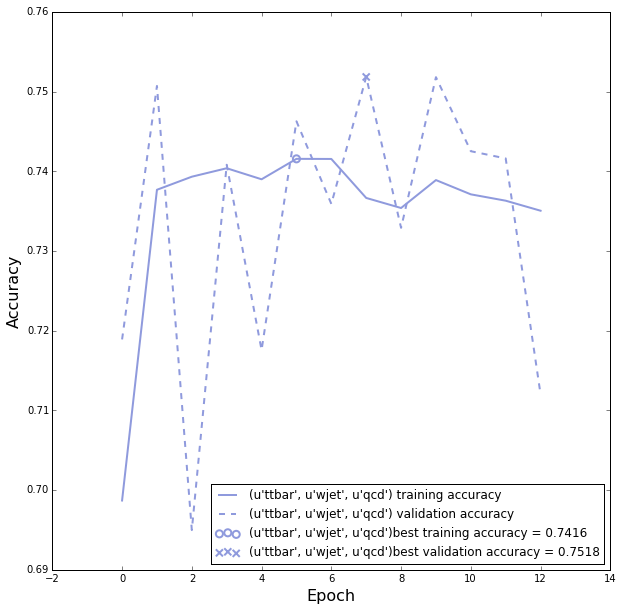

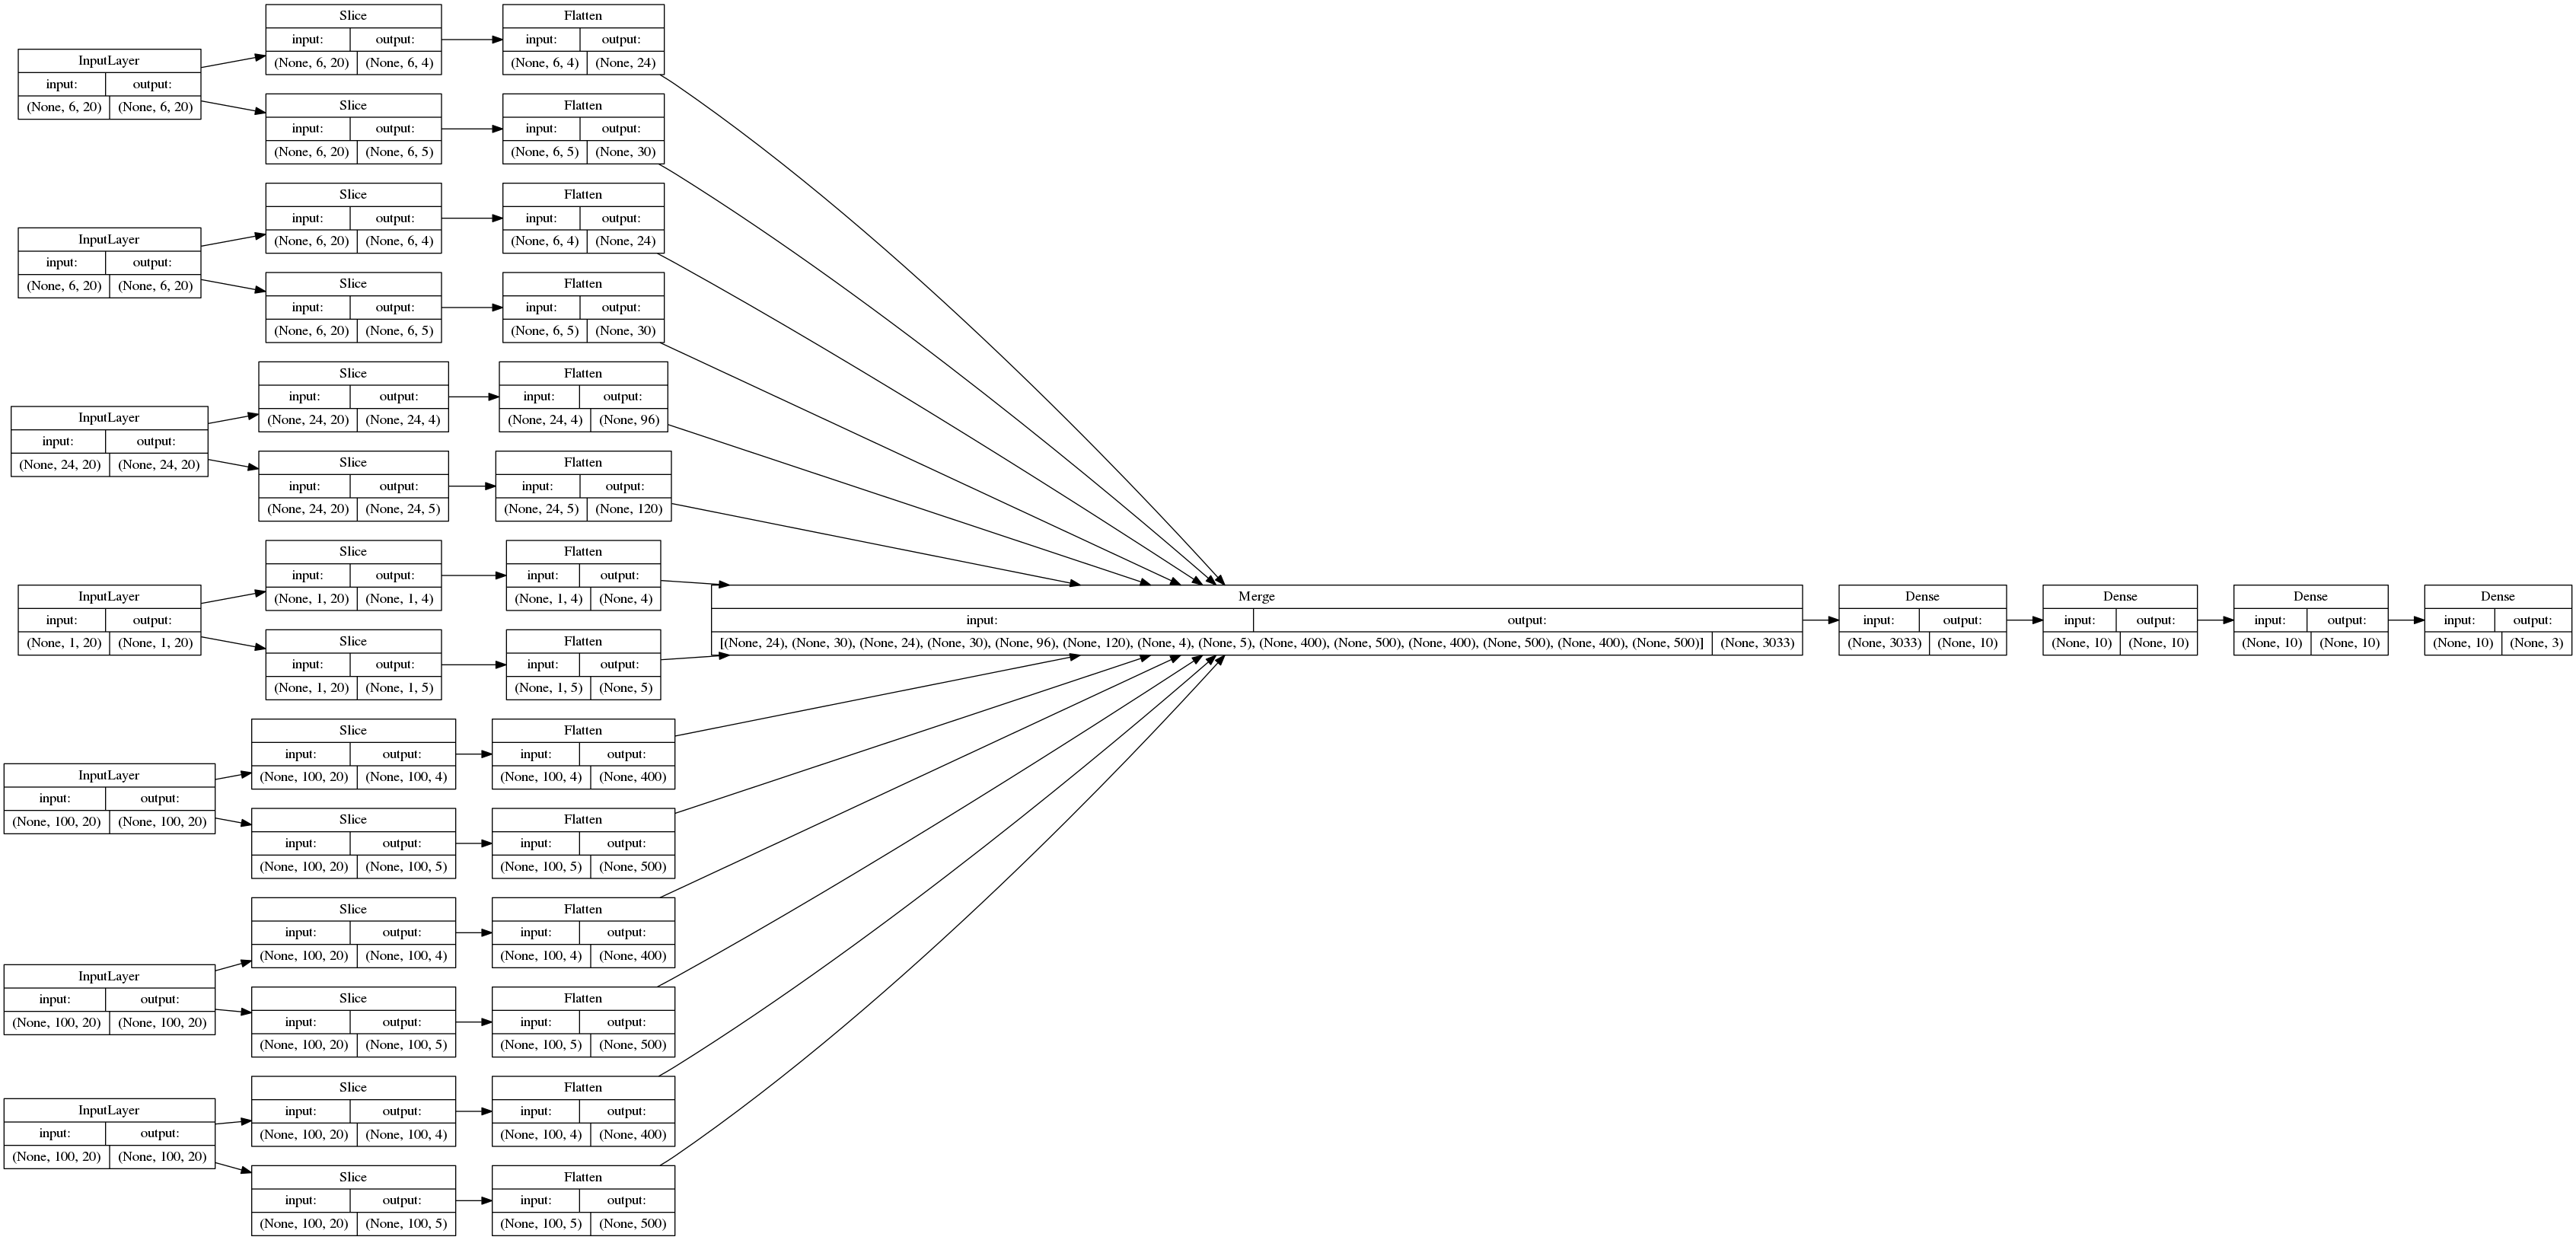

--------------------------------------------------
TRIAL SUMMARY (c7a92e7ca69f4e26b9606d4327c34a8244e52c25)
    Record_Info:
        name = [u'trial', u'not_lorentz'], elapse_time = 0:15:19, fit_cycles = 1
        val_acc = 0.7508
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 3, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


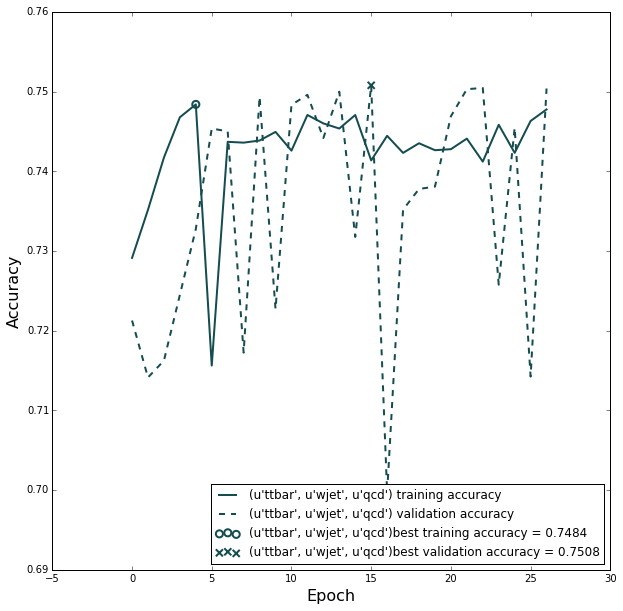

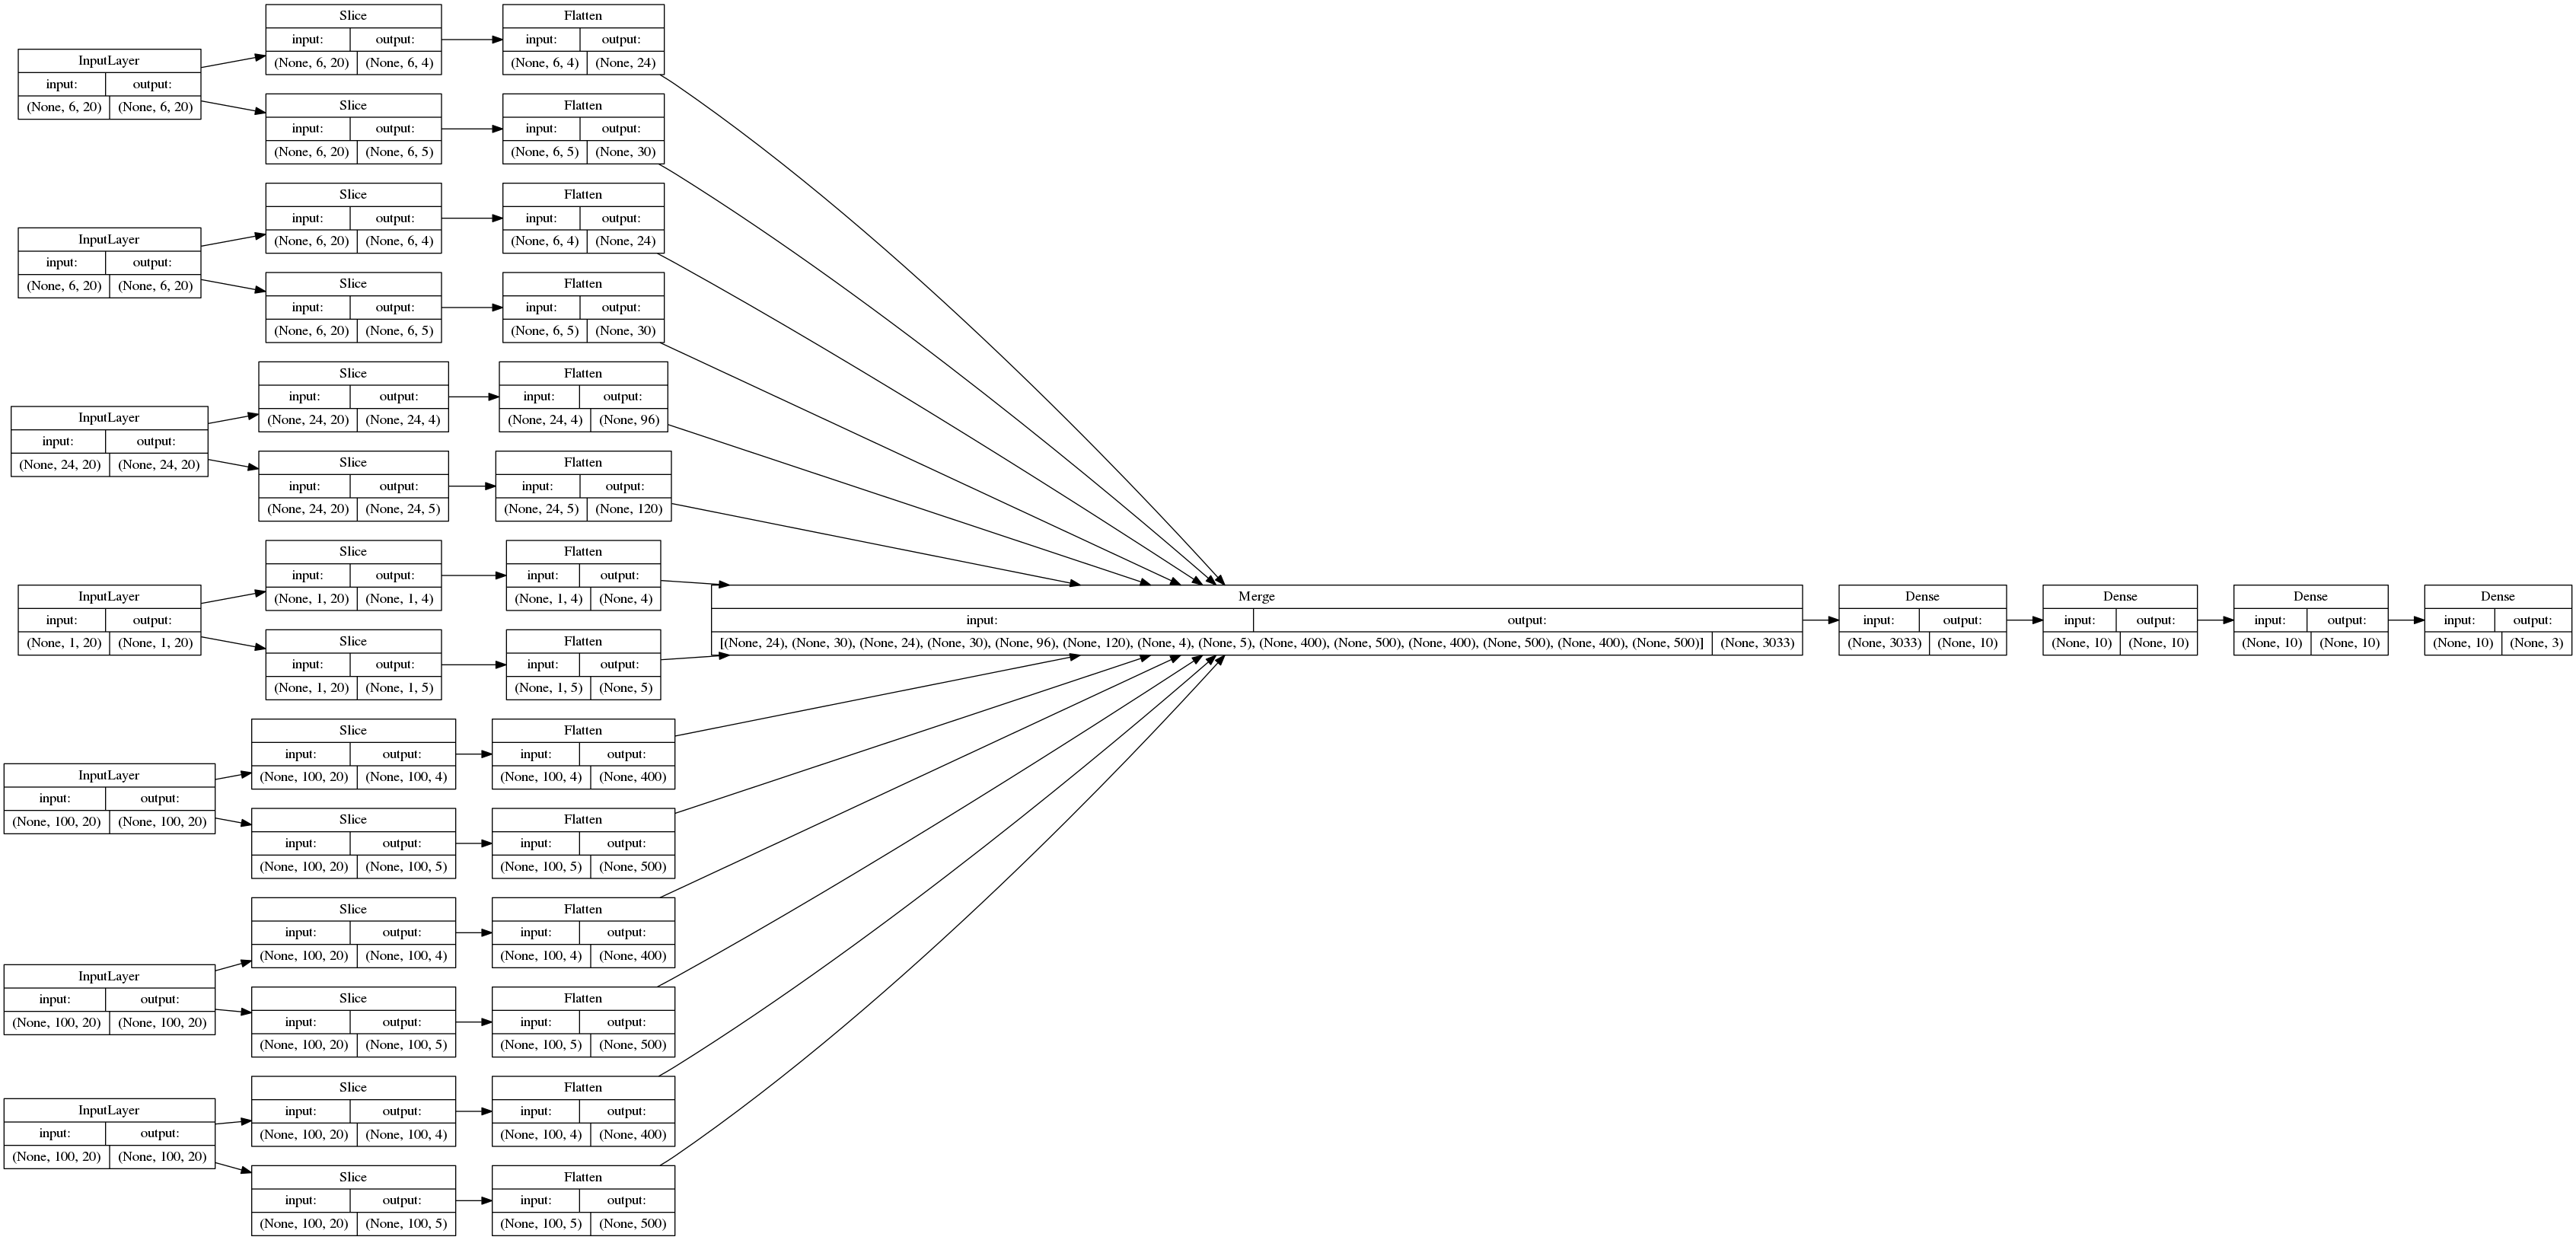

In [4]:
plotEverything(best_controls, custom_objects={"Slice":Slice, "Lorentz" : Lorentz})

--------------------------------------------------
TRIAL SUMMARY (ae2d51342363d122e55c29ce25d39f7130694193)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 7:01:12, fit_cycles = 1
        val_acc = 0.9491
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 5, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


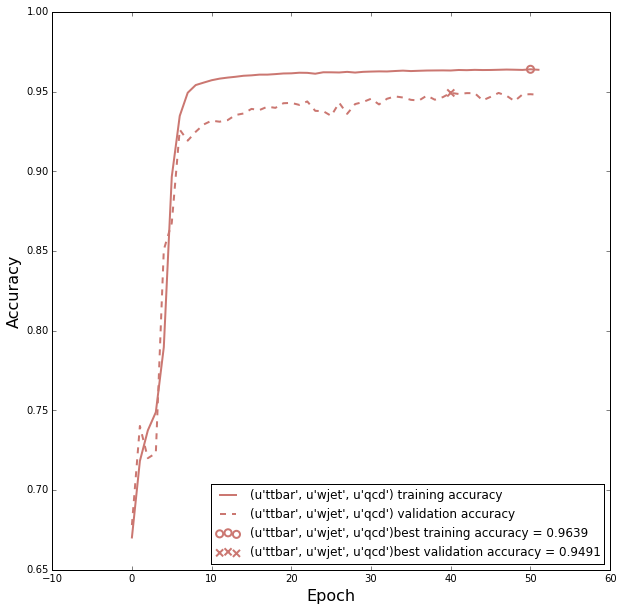

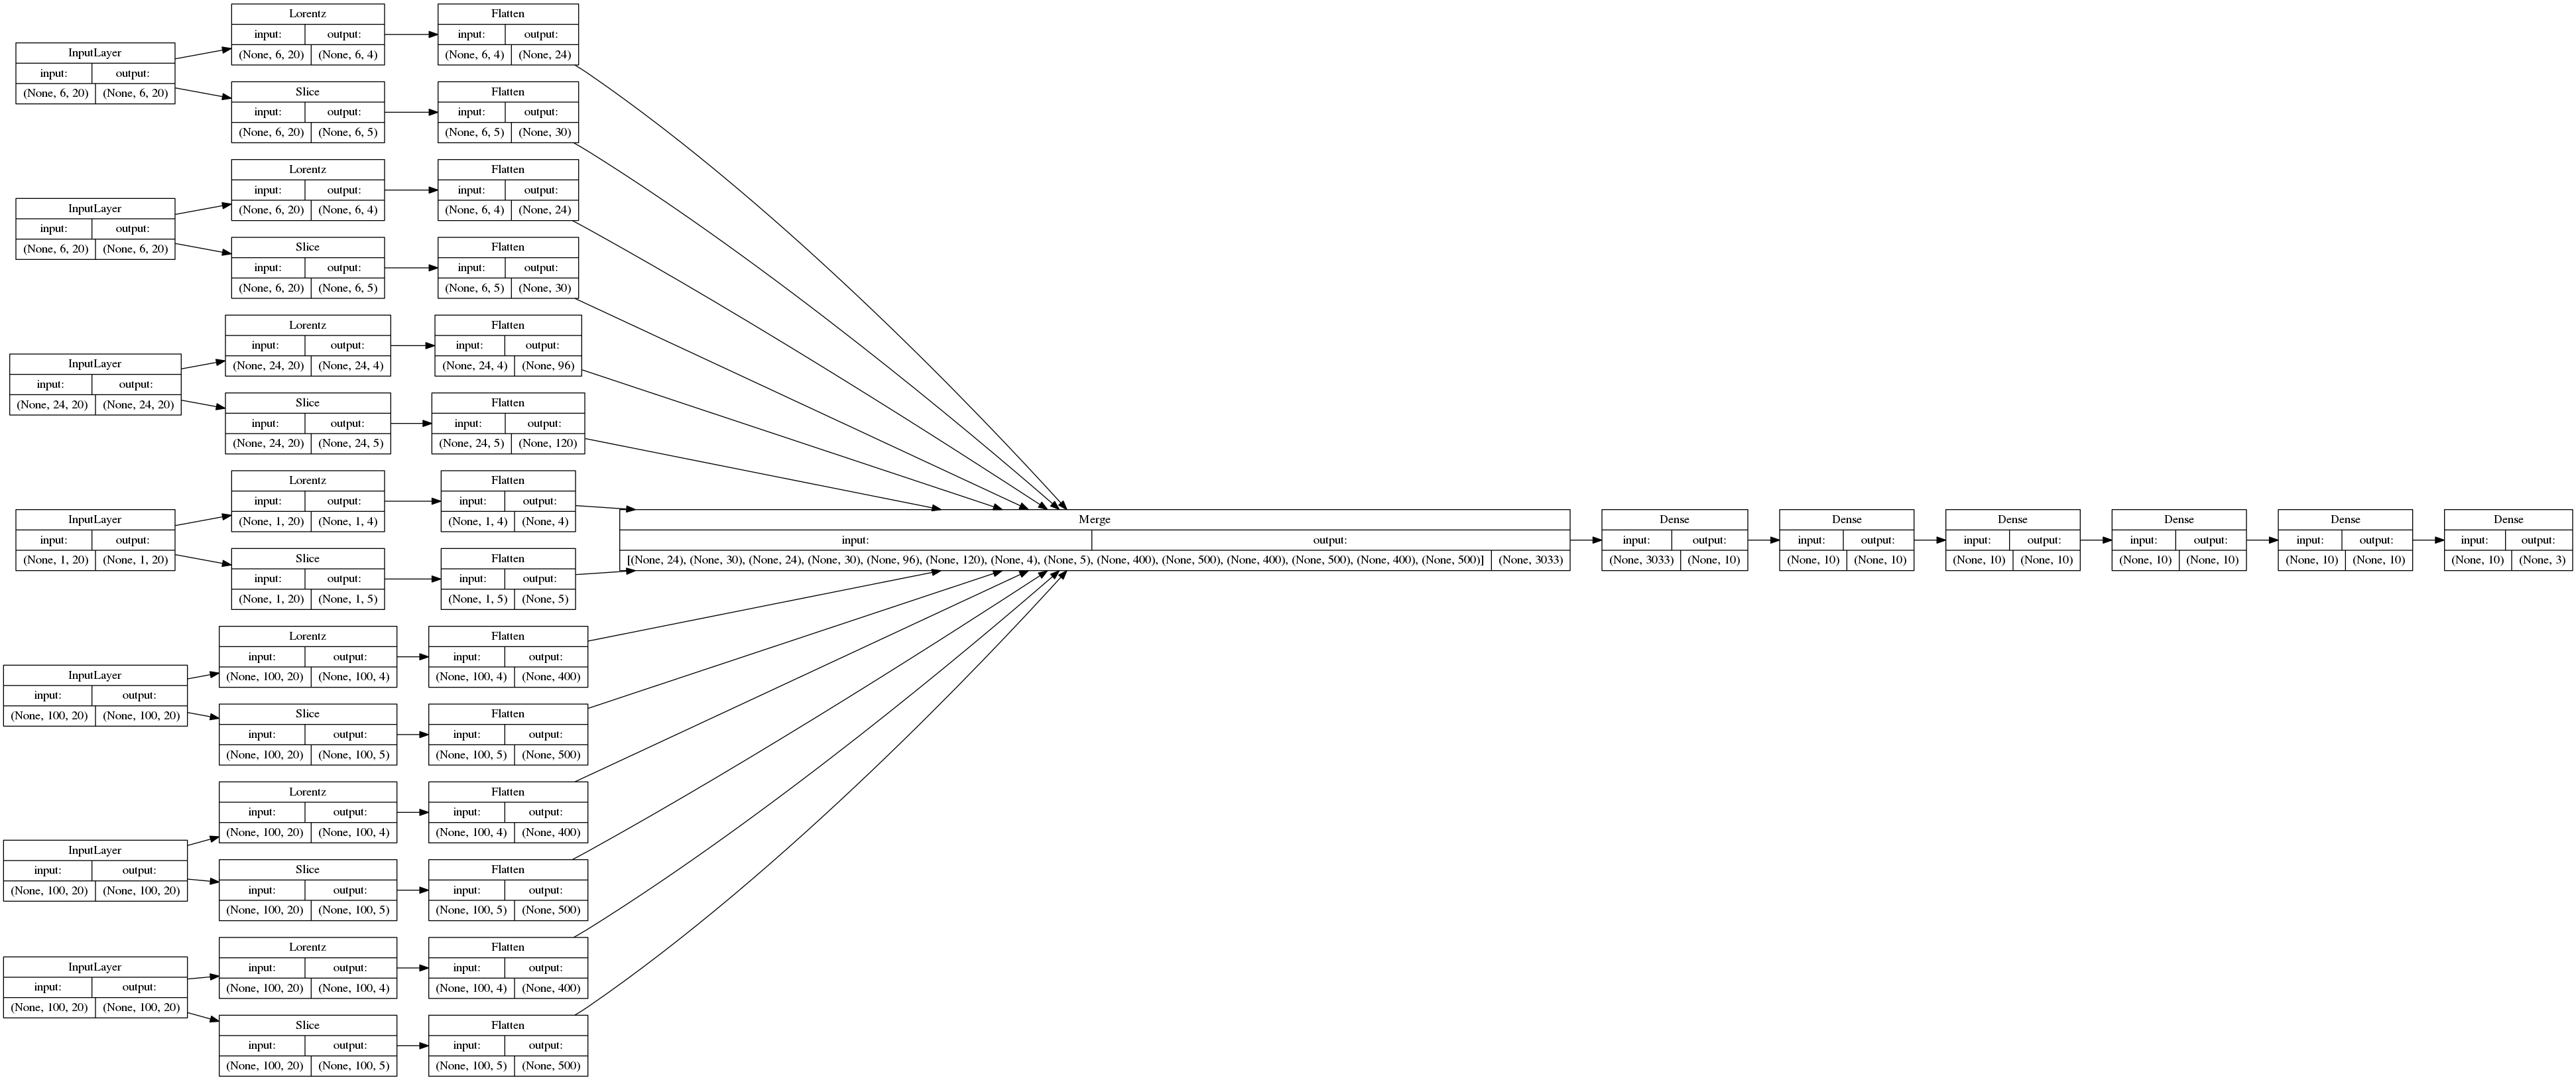

--------------------------------------------------
TRIAL SUMMARY (ed6ef39ebe37004406094a178b072c0bf165073b)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 7:49:08, fit_cycles = 1
        val_acc = 0.9478
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 4, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


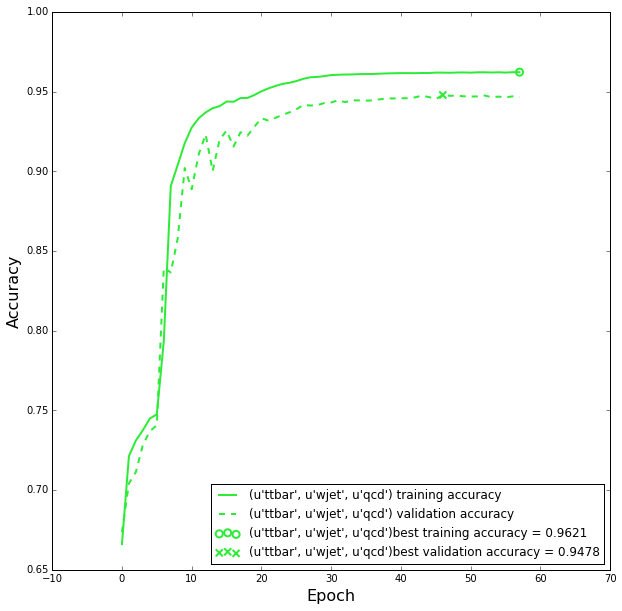

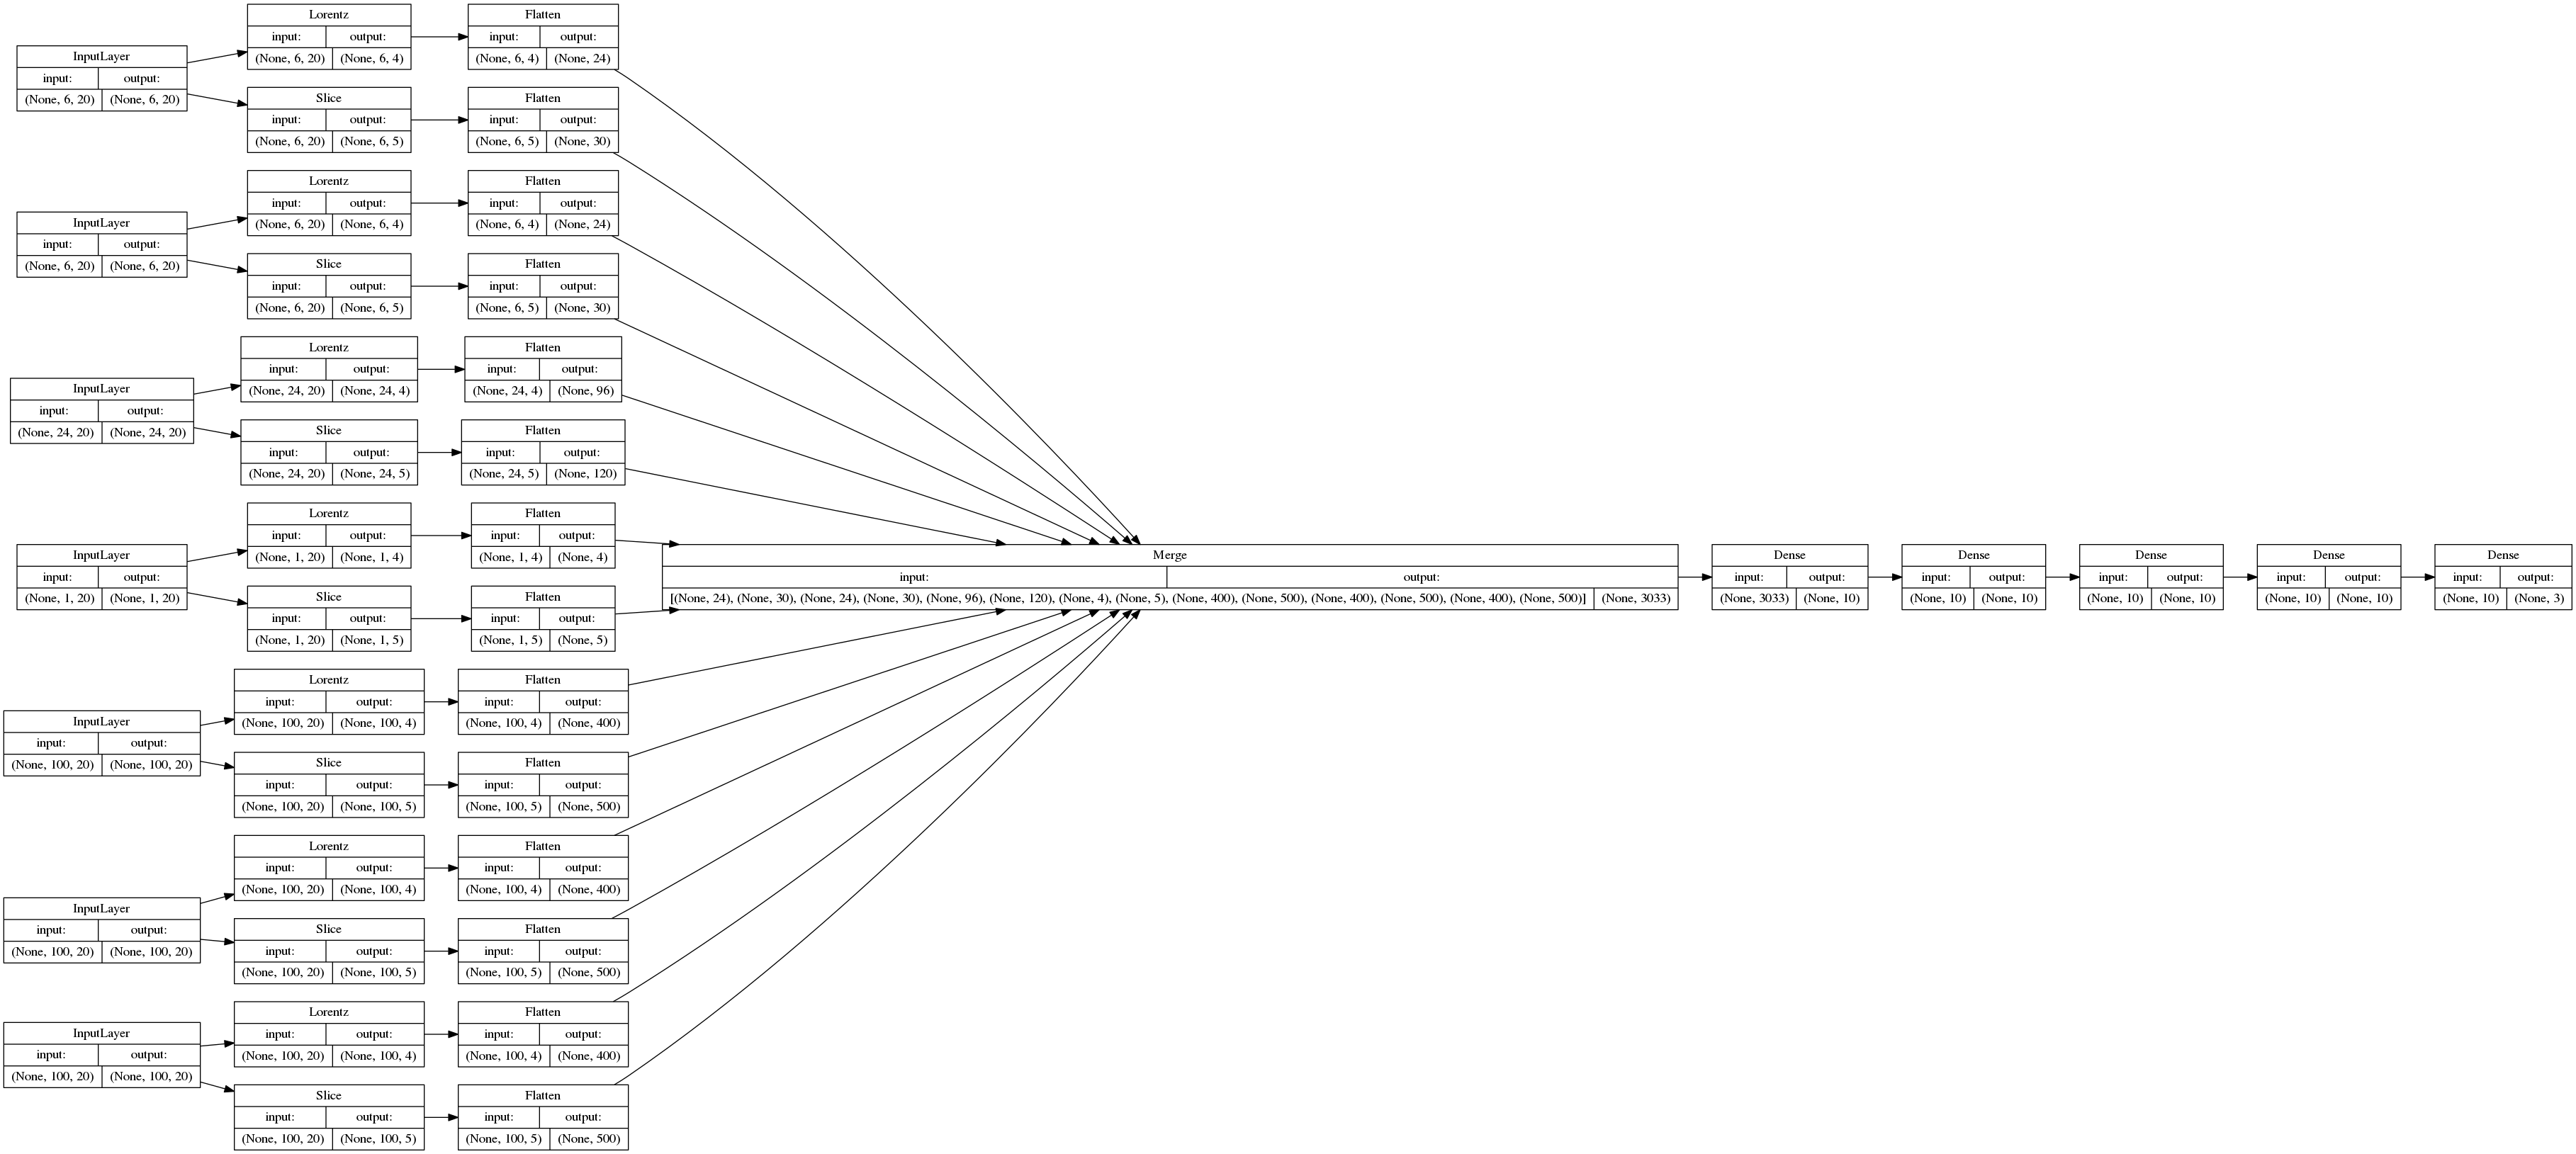

--------------------------------------------------
TRIAL SUMMARY (69e5f7e75198efa8000f86a61bc10b7fbeda266a)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 6:51:27, fit_cycles = 1
        val_acc = 0.9448
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 3, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 50
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


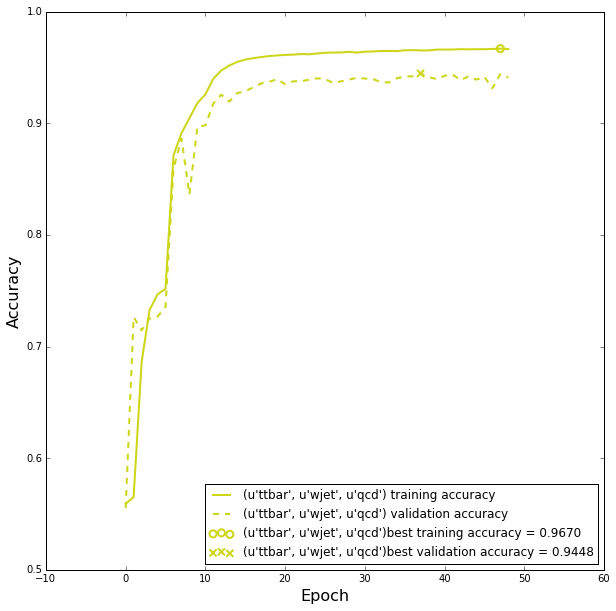

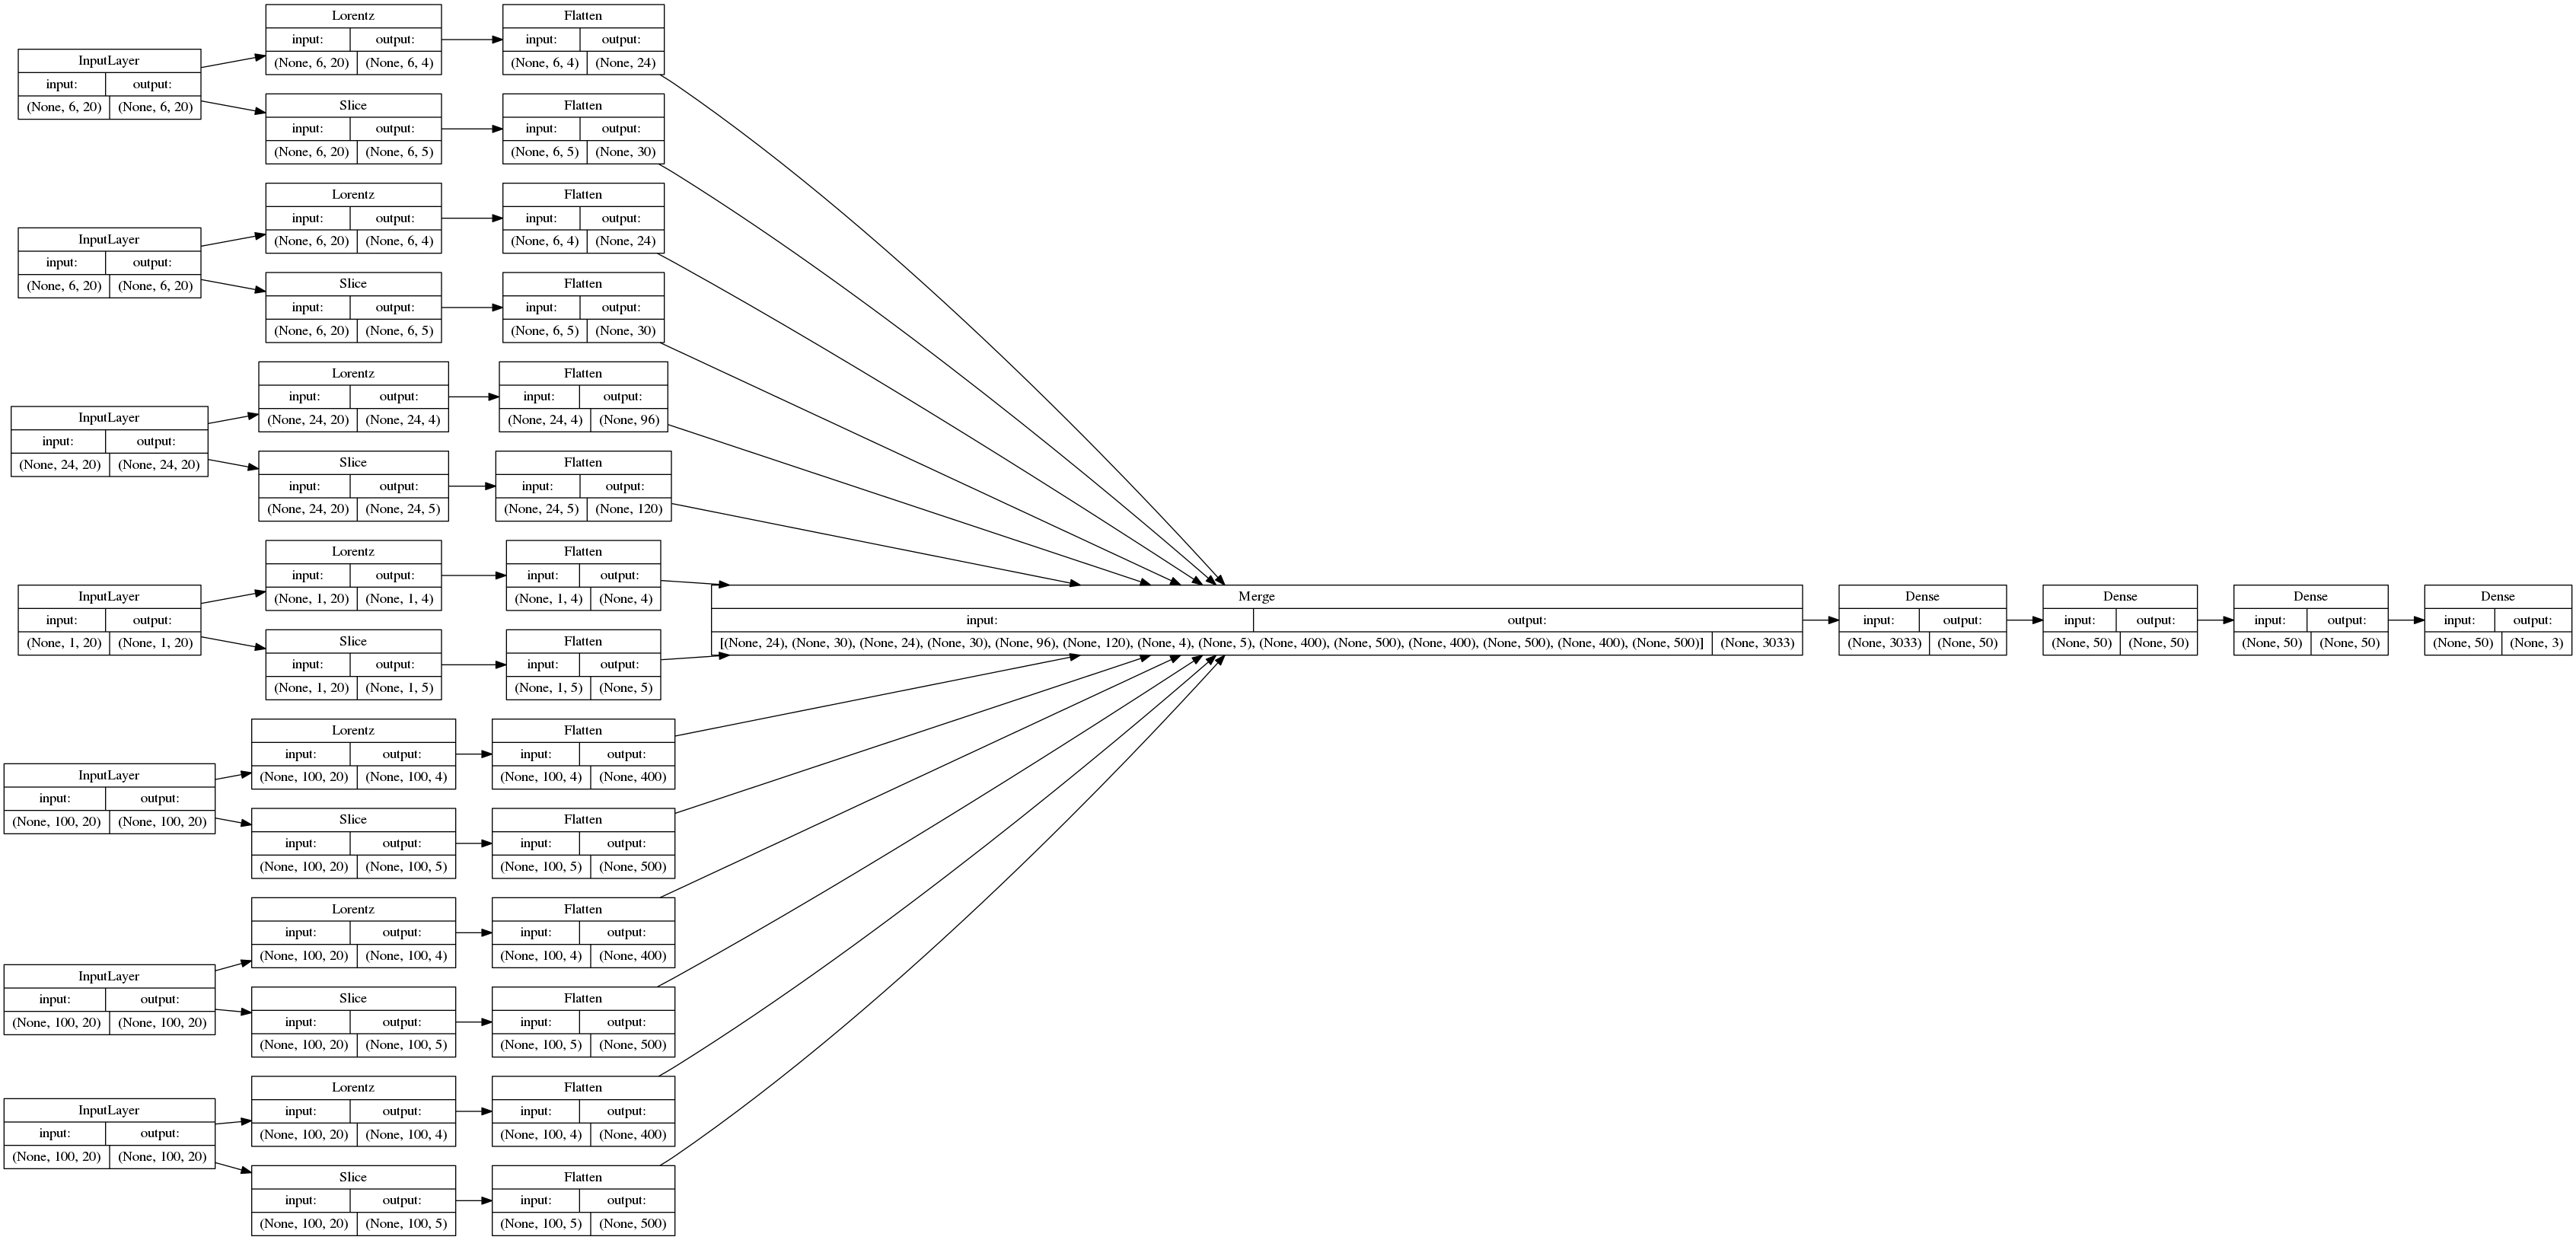

--------------------------------------------------
TRIAL SUMMARY (3946fe6ab60ff90a05ce469b695e4a2bf5a479af)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 3:09:45, fit_cycles = 1
        val_acc = 0.9412
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 5, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 25
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


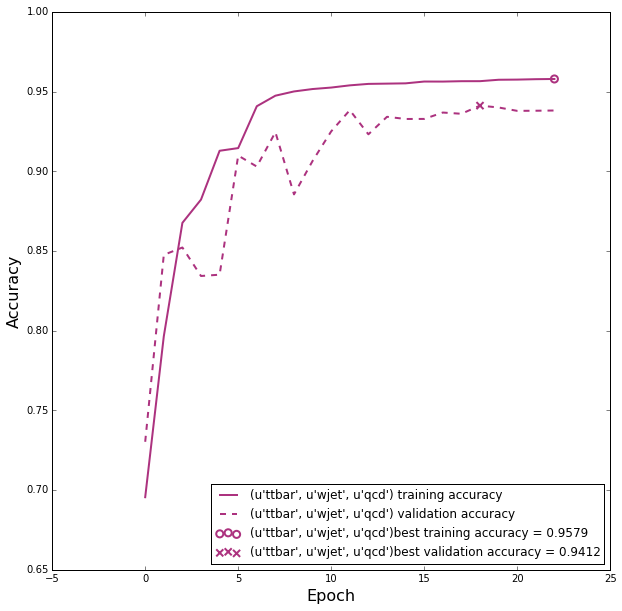

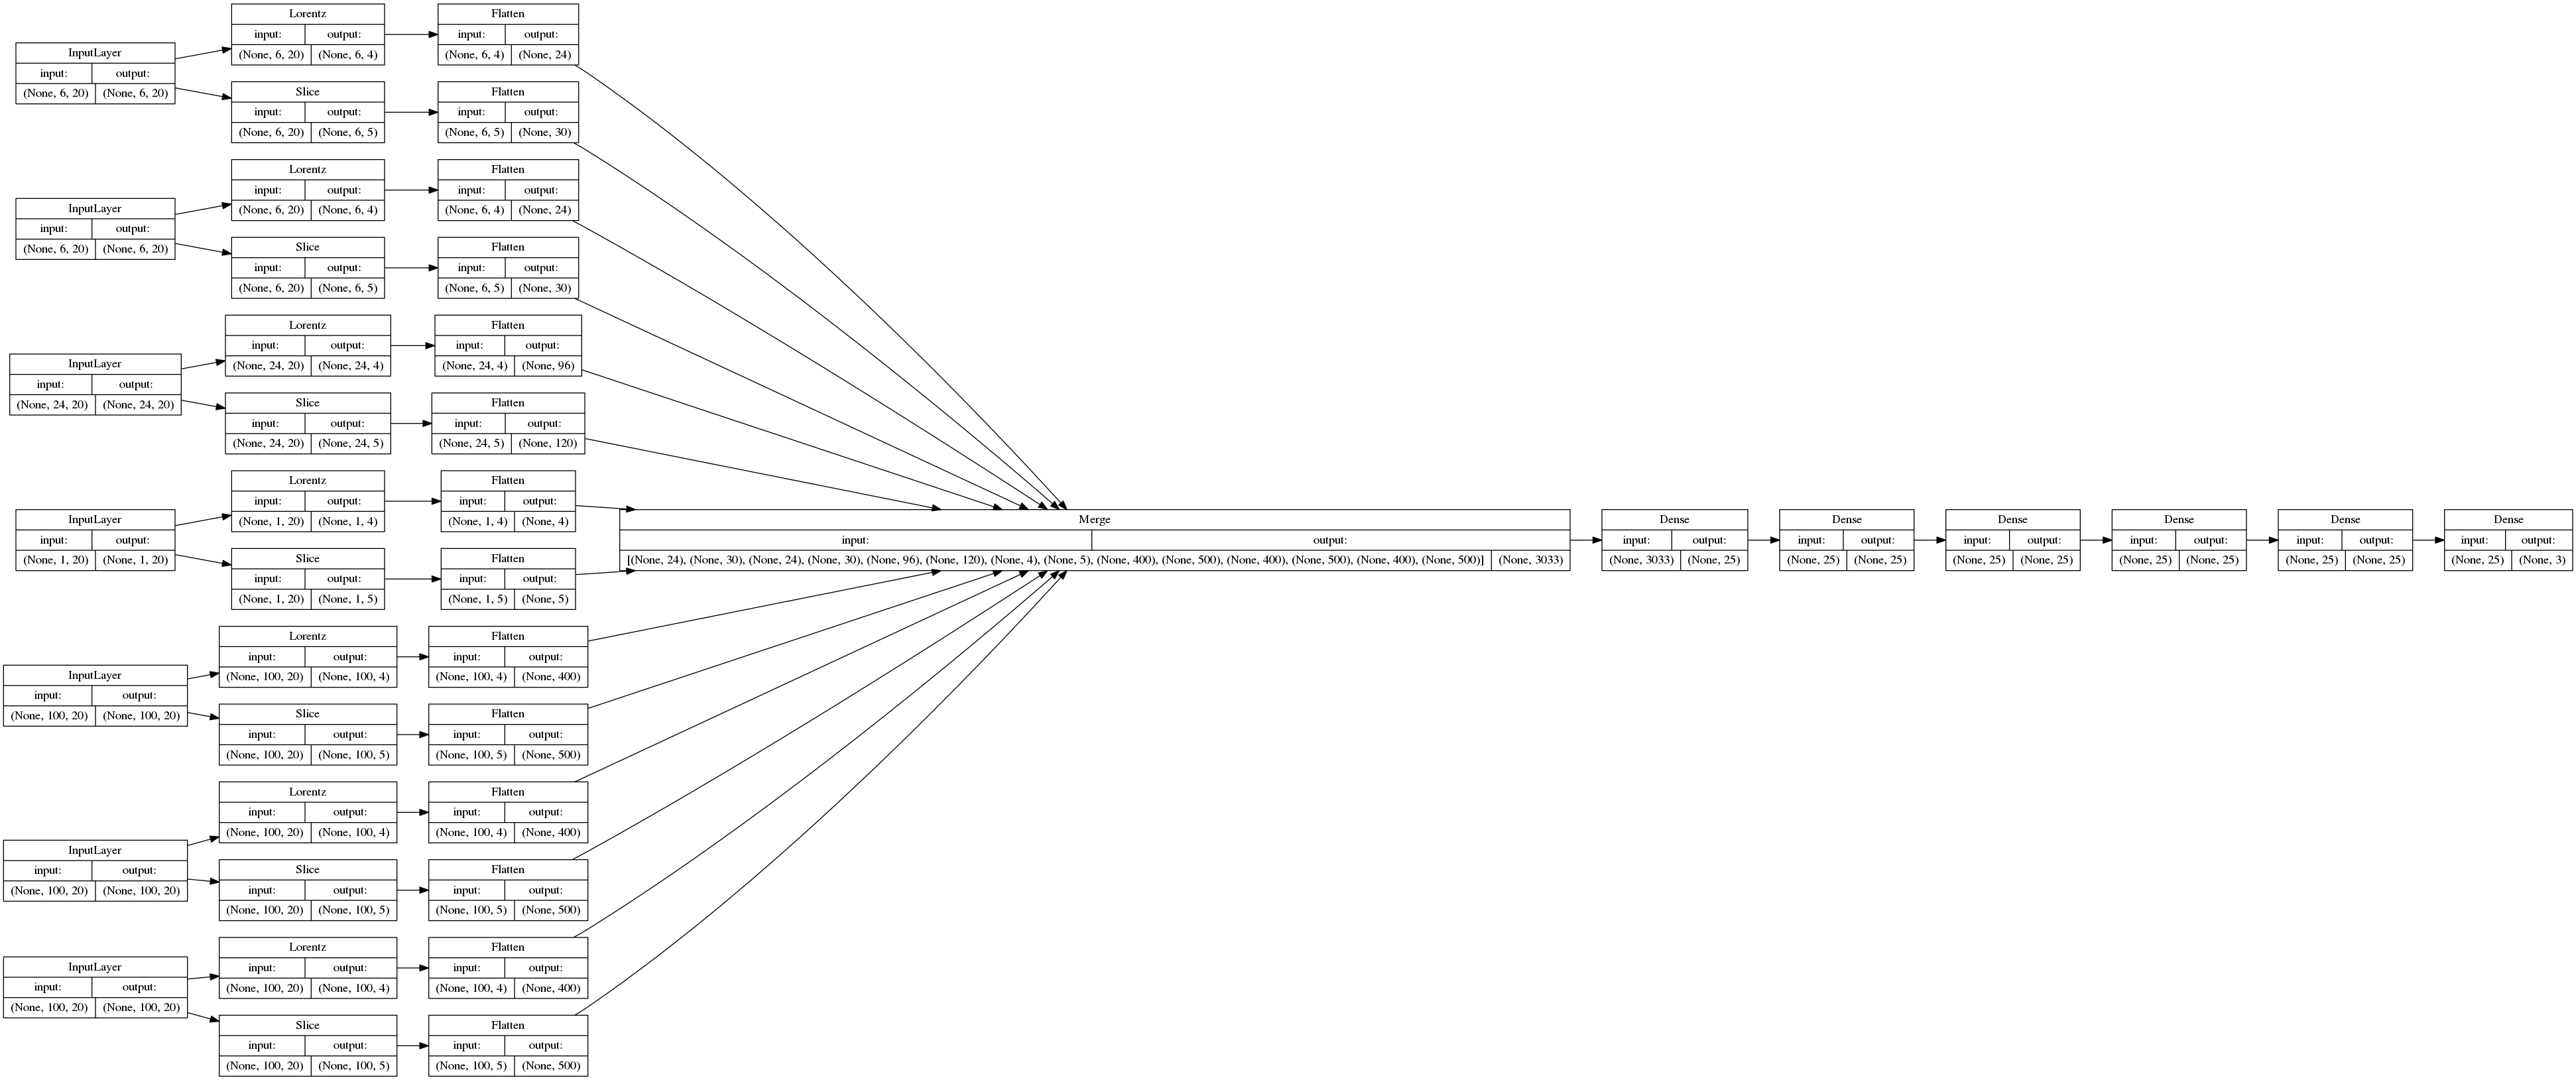

In [5]:
plotEverything(best_lorentzs, custom_objects={"Slice":Slice, "Lorentz" : Lorentz})

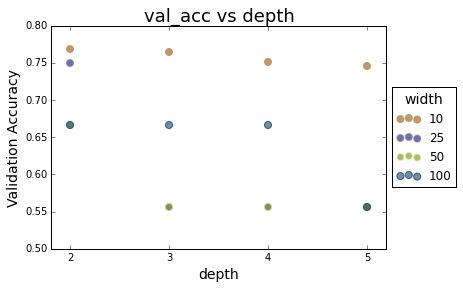

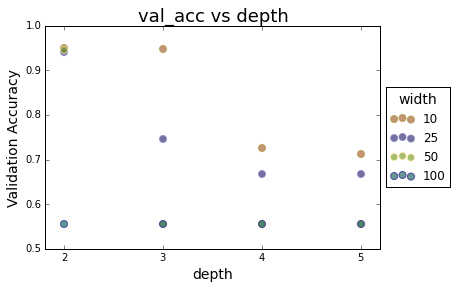

In [6]:
plotMetricVsMetric(control, "depth", metricY="val_acc", groupOn="width",
                       ylabel="Validation Accuracy",legend_label="width", constants={}, mode="max", alpha=.7, verbose=0)
plotMetricVsMetric(lorentz, "depth", metricY="val_acc", groupOn="width",
                       ylabel="Validation Accuracy",legend_label="width", constants={}, mode="max", alpha=.7, verbose=0)

--------------------------------------------------
TRIAL SUMMARY (ae2d51342363d122e55c29ce25d39f7130694193)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 7:01:12, fit_cycles = 1
        val_acc = 0.9491
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 5, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


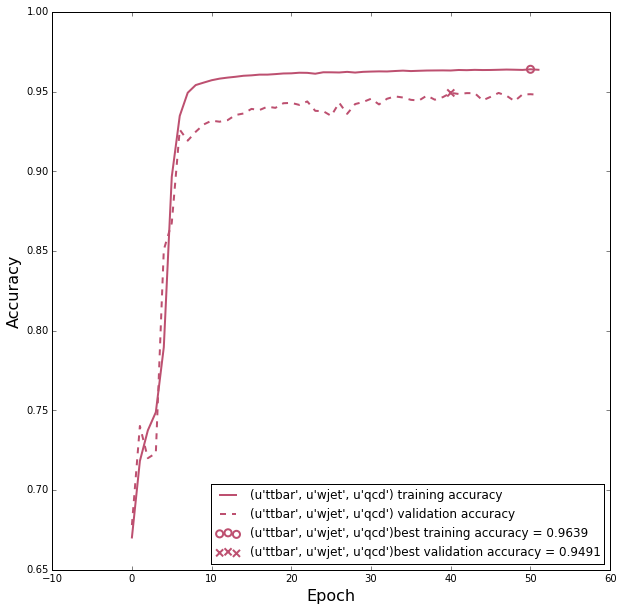

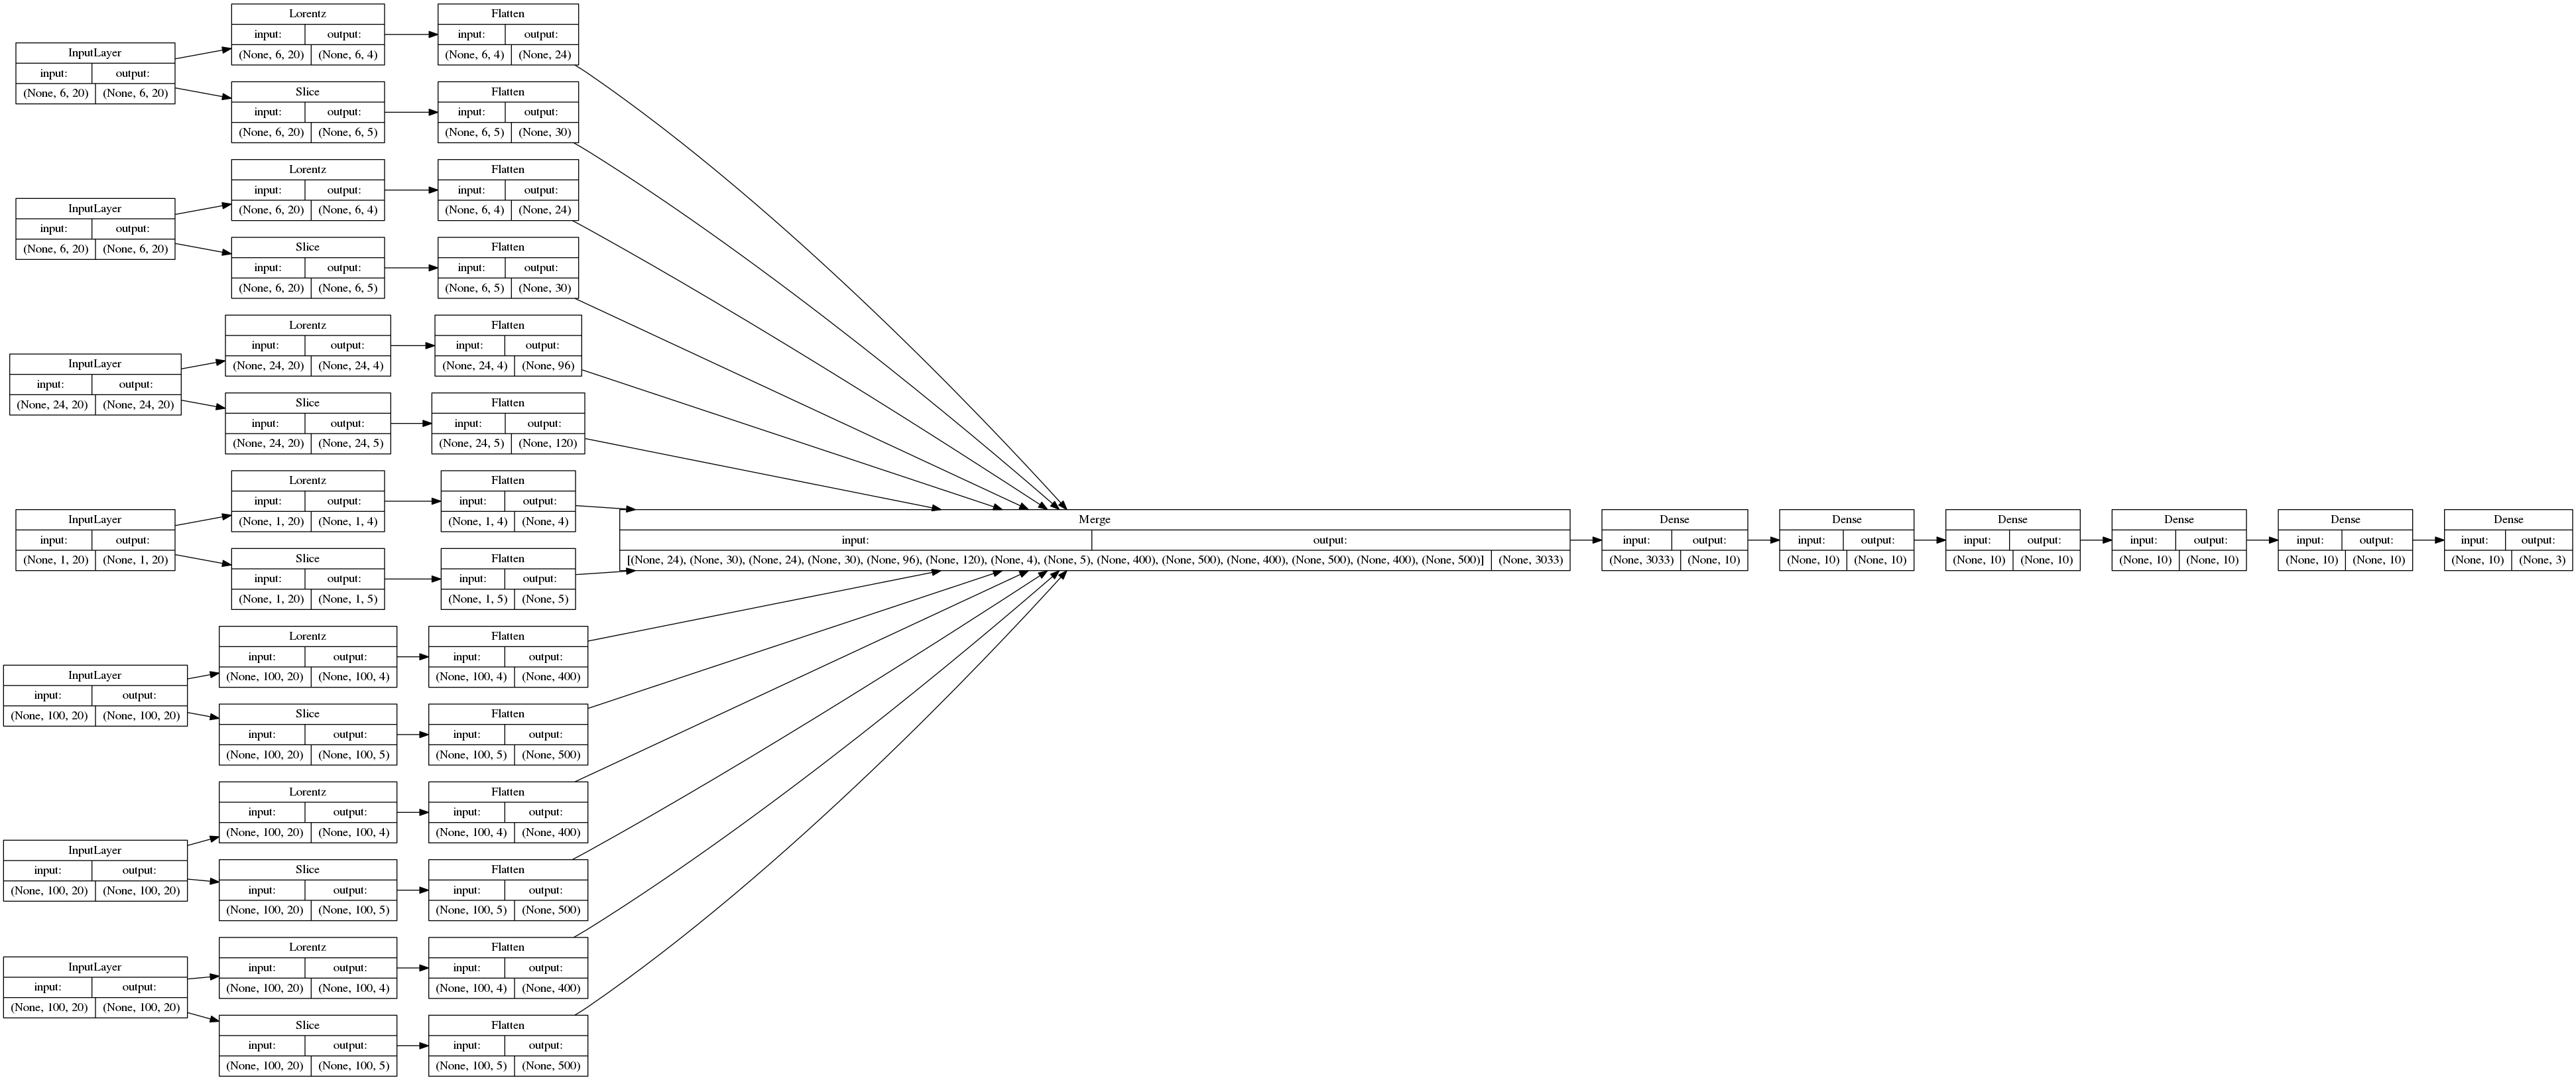

In [10]:
top_lorentz = findWithMetrics(lorentz, {"depth" : 5,
                                        "width": 10})
plotEverything(top_lorentz)

--------------------------------------------------
TRIAL SUMMARY (ae2d51342363d122e55c29ce25d39f7130694193)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 7:01:12, fit_cycles = 1
        val_acc = 0.9491
        num_train = 300000, num_validation = 60000
        activation = relu, depth = 5, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], max_EFlow_size = 100, optimizer = adam, sort_on = PT_ET, width = 10
    Fit:
        batch_size=32, nb_epoch=100, callbacks=[{u'patience': 10, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


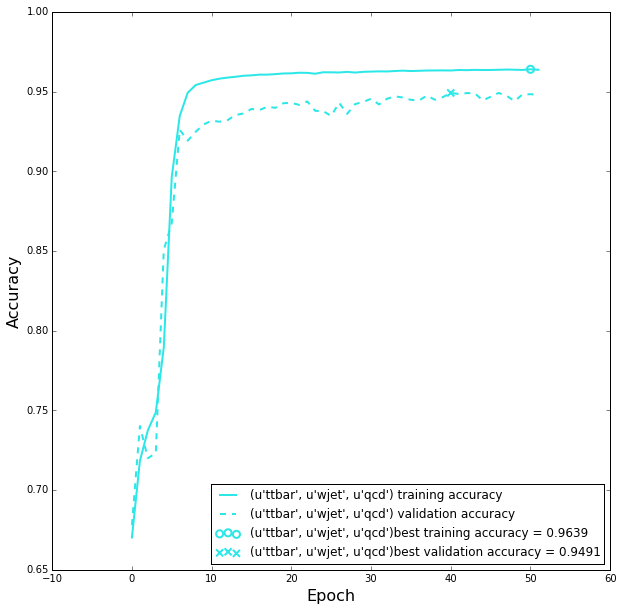

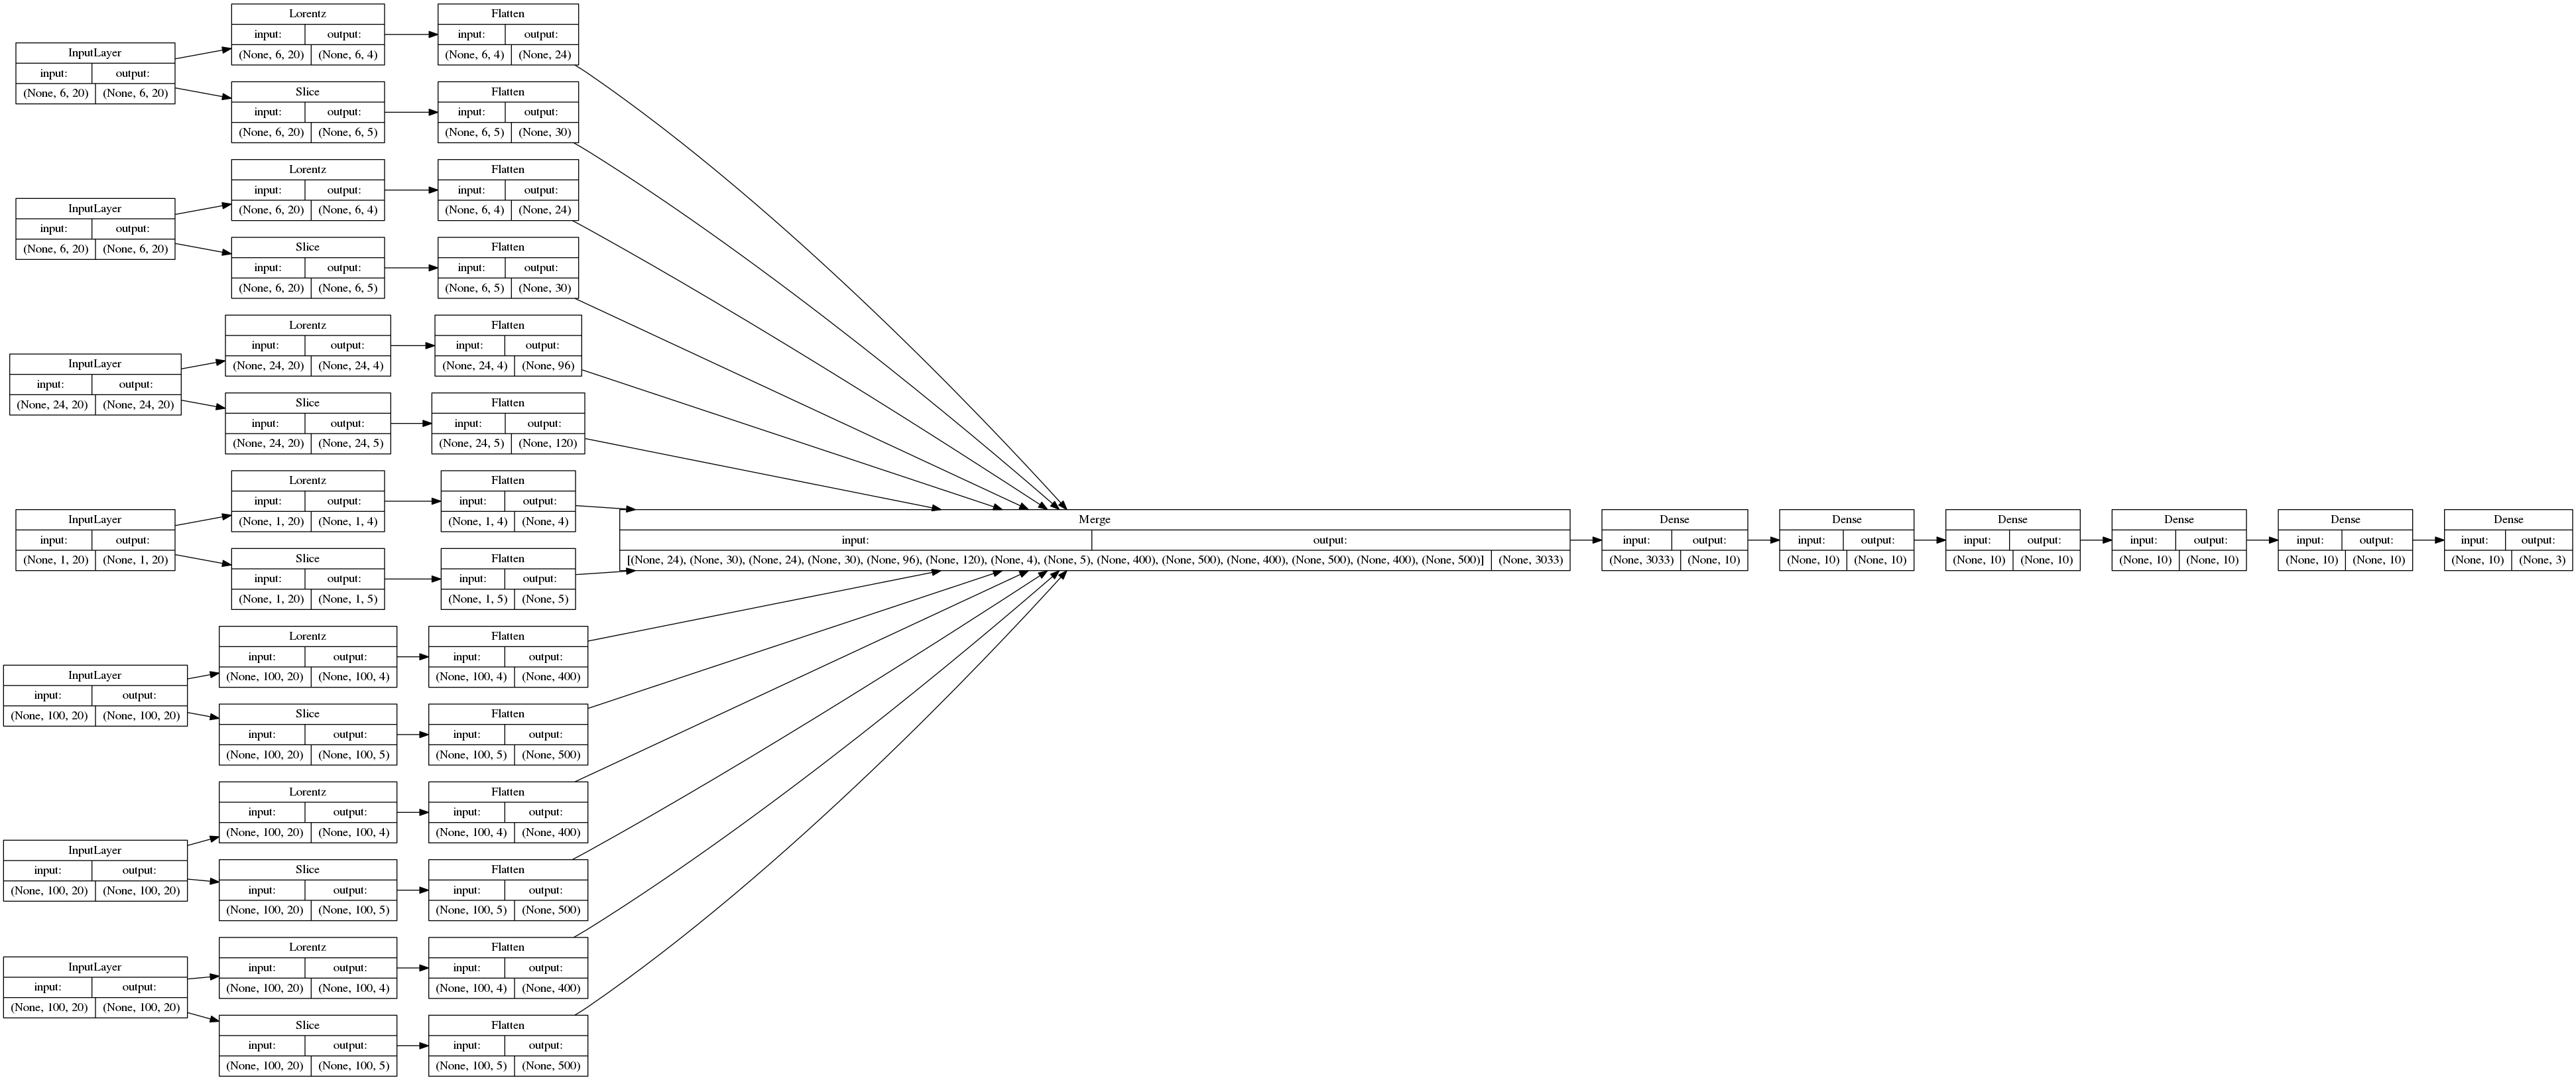

In [11]:
matching_control = findWithMetrics(control, {"depth" : 5,
                                        "width": 10})
plotEverything(matching_control)